<a href="https://colab.research.google.com/github/kamaluddin14/Covid-19-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/uploaded files/Coronavirus Tweets.csv',encoding='latin1')

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
dataset.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
dataset.shape

(41157, 6)

We have 41157 rows and 6 columns.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
dataset.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are 8590 null values in the location column but we don’t need to deal with them as we are just going to use two columns i.e. “Sentiment” and “Original Tweet”. 

# **EDA**

### Location Analysis

In [ ]:
dataset.Location.value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

We can see there are 12220 Different Locations.

In [ ]:
Top_Location_Of_tweet= dataset['Location'].value_counts().head(10)
Top_Location_Of_tweet

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
# parameters for pie chart.
location_analysis = dataset['Location'].value_counts().index
label = dataset['Location'].value_counts().values

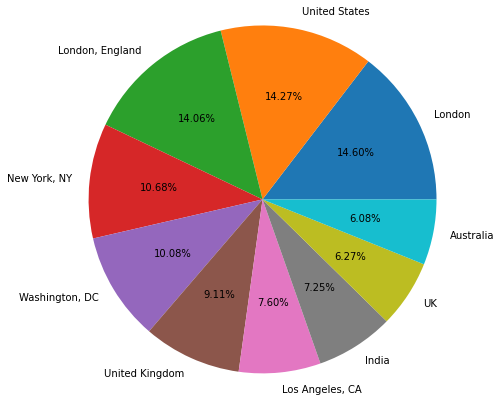

In [ ]:
# top 10 Location where Maximum tweets are comming from.

plt.pie(label[:10], labels=location_analysis[:10], autopct='%1.2f%%',radius=2)
plt.show()

We can see Most Tweets are comming from London. almost 28.66%,

### Sentiment Analysis

In [ ]:
Sentiment_count= dataset['Sentiment'].value_counts()
Sentiment_count

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

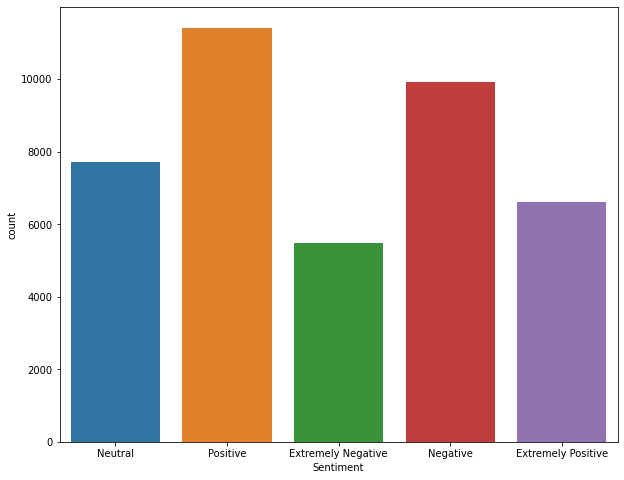

In [ ]:
plt.rcParams['figure.figsize']= (10,8)
sns.countplot(x= 'Sentiment', data= dataset)
plt.show()

When we try to explore the ‘Sentiment’ column, we came to know that most of the peoples are having positive sentiments about various issues shows us their optimism during pandemic times. Very few people are having extremely negatives thoughts about Covid-19.

### Lets see some Tweets of Positive Sentiment.

In [ ]:
dataset[dataset['Sentiment']=='Positive']


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive


In [ ]:
#Lets see the Orignal tweeet
dataset[dataset['Sentiment']=='Positive'].loc[3,'OriginalTweet']

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

### Extemely POsitive Tweets

In [ ]:
dataset[dataset['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [ ]:
dataset[dataset['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

### Tweet Dates Analysis.

In [ ]:
#lets convert TweetAt column to datetime Foemat.
dataset["TweetAt"]=pd.to_datetime(dataset["TweetAt"],dayfirst=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
#Lets extract the important features from TweetAt column.
dataset["day_of_week"]=dataset["TweetAt"].dt.dayofweek
dataset["month"]=dataset["TweetAt"].dt.month
dataset["day_of_month"]=dataset["TweetAt"].dt.day


In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,3,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,0,3,16
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,3,16


In [ ]:
#Month Analysis 
dataset.month.value_counts()

3    25499
4    15658
Name: month, dtype: int64

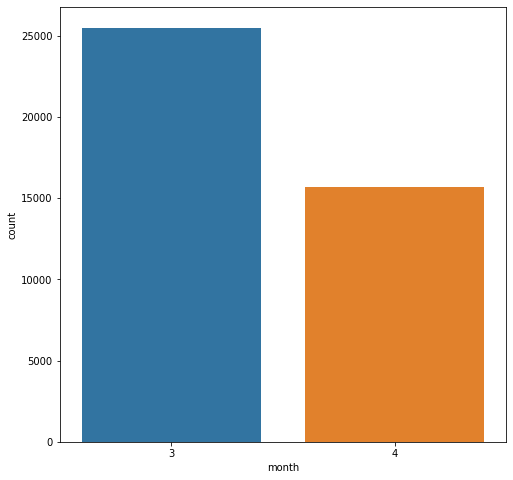

In [ ]:
#plot showing monthly tweets
plt.rcParams['figure.figsize']= (8,8)
sns.countplot(x= 'month', data= dataset)
plt.show()

Maximum Tweets are from the month of March 25499 tweets.

In [ ]:
dataset.TweetAt.value_counts()

2020-03-20    3448
2020-03-19    3215
2020-03-25    2979
2020-03-18    2742
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-17    1977
2020-04-08    1881
2020-04-07    1843
2020-04-06    1742
2020-03-24    1480
2020-04-09    1471
2020-04-13    1428
2020-03-26    1277
2020-04-05    1131
2020-04-10    1005
2020-04-02     954
2020-04-11     909
2020-04-03     810
2020-04-12     803
2020-04-04     767
2020-03-16     656
2020-04-01     630
2020-03-27     345
2020-03-31     316
2020-04-14     284
2020-03-29     125
2020-03-30      87
2020-03-28      23
Name: TweetAt, dtype: int64

We have Data of Tweets from March 16 to April 14 of 2020.




In [ ]:
#Daily tweets
dataset.day_of_month.value_counts()

20    3448
19    3215
25    2979
18    2742
21    2653
22    2114
23    2062
17    1977
8     1881
7     1843
6     1742
24    1480
9     1471
13    1428
26    1277
5     1131
10    1005
2      954
11     909
3      810
12     803
4      767
16     656
1      630
27     345
31     316
14     284
29     125
30      87
28      23
Name: day_of_month, dtype: int64

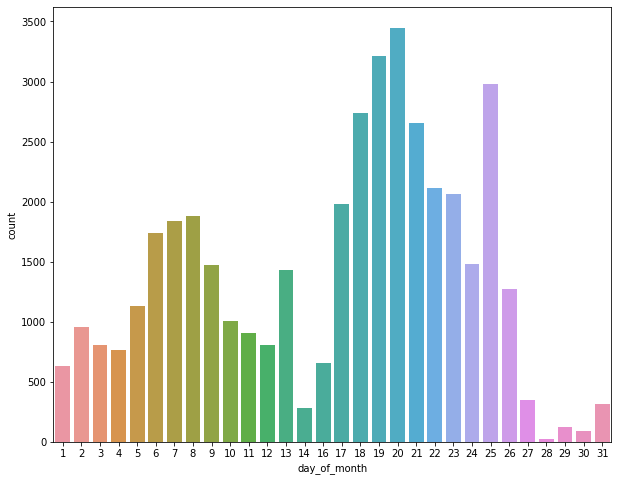

In [ ]:
#Plots showing Daily tweets count
plt.rcParams['figure.figsize']= (10,8)
sns.countplot(x= 'day_of_month', data= dataset)
plt.show()

Most people Tweeted on 18 to 25th of the Month of March. We know Corona was spreading Rapidly during March2020 and It was announced National Emergency in western countries and declared a Pandemic by WHO during March.

In [ ]:
#weekly tweets
dataset.day_of_week.value_counts()

2    8232
3    6917
0    5975
1    5900
4    5608
5    4352
6    4173
Name: day_of_week, dtype: int64

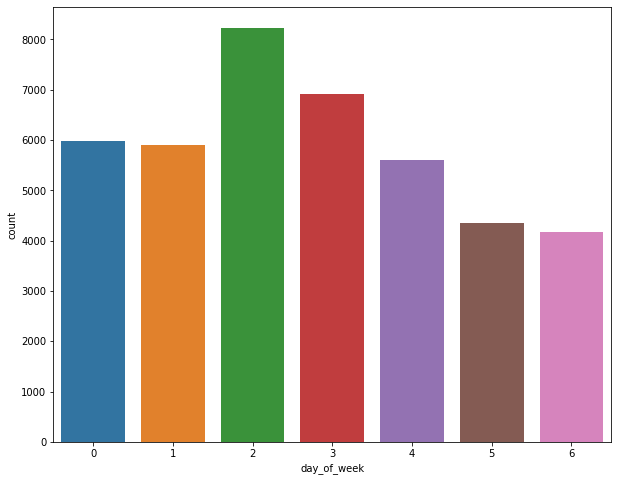

In [ ]:
# Plots showing weekly Tweets
plt.rcParams['figure.figsize']= (10,8)
sns.countplot(x= 'day_of_week', data= dataset)
plt.show()

Most People Tweeted on Twesday and Wednesday of Week.

# **DATA PREPROCESSING**

The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation(.,?,” etc.), special characters(@,%,&,$, etc.), numbers(1,2,3, etc.), tweeter handle, links(HTTPS: / HTTP:)and terms which don’t carry much weightage in context to the text.

In [ ]:
#import some liabrary for preprocessing.
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
dataset.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,3,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,0,3,16
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,3,16
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,0,3,16
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,0,3,16
7,3806,48758,Austria,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral,0,3,16
8,3807,48759,"Atlanta, GA USA",2020-03-16,Due to COVID-19 our retail store and classroom...,Positive,0,3,16
9,3808,48760,"BHAVNAGAR,GUJRAT",2020-03-16,"For corona prevention,we should stop to buy th...",Negative,0,3,16


Here in our Orignal Tweet column we have "urls, hashtags, @Mentions" and many stop words and symbols, so lets remove them.

In [ ]:
# function to removr Urls, Mentions and Hashtags
def remove_noise(tweet):
  #remove @Mentions
  tweet= re.sub(r'@\w+','', tweet)
  # remove urls
  tweet = re.sub(r'http\S+', '', tweet)
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  return tweet


In [ ]:
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_noise)

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,and and,Neutral,0,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,3,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,0,3,16
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the out...",Extremely Negative,0,3,16


In [ ]:
dataset['OriginalTweet'][1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

We have sucessfully removed Urls, mentions and hashtags from our tweets.

### Now lets Remove Stop words, punctuations and symbols.

### Funtion to remove punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [ ]:
# let apply the function
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(remove_punctuation)

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,and and,Neutral,0,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia Woolworths to give elder...,Positive,0,3,16
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,0,3,16
4,3803,48755,NaN,2020-03-16,Me ready to go at supermarket during the outb...,Extremely Negative,0,3,16


In [ ]:
dataset['OriginalTweet'][2]

'Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID  outbreak '

We have sucessfully removed puntuations.

### Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(stopwords)
dataset.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month
0,3799,48751,London,2020-03-16,,Neutral,0,3,16
1,3800,48752,UK,2020-03-16,advice talk neighbours family exchange phone n...,Positive,0,3,16
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworths give elderly ...,Positive,0,3,16
3,3802,48754,NaN,2020-03-16,food stock one empty please dont panic enough ...,Positive,0,3,16
4,3803,48755,NaN,2020-03-16,ready go supermarket outbreak im paranoid food...,Extremely Negative,0,3,16
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,news regionâs first confirmed covid case came...,Positive,0,3,16
6,3805,48757,"35.926541,-78.753267",2020-03-16,cashier grocery store sharing insights prove c...,Positive,0,3,16
7,3806,48758,Austria,2020-03-16,supermarket today didnt buy toilet paper,Neutral,0,3,16
8,3807,48759,"Atlanta, GA USA",2020-03-16,due covid retail store classroom atlanta open ...,Positive,0,3,16
9,3808,48760,"BHAVNAGAR,GUJRAT",2020-03-16,corona preventionwe stop buy things cash use o...,Negative,0,3,16


In [ ]:
dataset['OriginalTweet'][2]

'coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak'

we have successfully removed all stop words.

In [ ]:
# remove short words which have no meaning and shorter than 3.
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

### Tokenizing

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
dataset['OriginalTweet'][3]

['food',
 'stock',
 'empty',
 'please',
 'dont',
 'panic',
 'enough',
 'food',
 'everyone',
 'take',
 'need',
 'stay',
 'calm',
 'stay',
 'safe']

In [ ]:
dataset['length']= dataset['OriginalTweet'].apply(lambda x: len(x))
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month,length
0,3799,48751,London,2020-03-16,[],Neutral,0,3,16,0
1,3800,48752,UK,2020-03-16,"[advice, talk, neighbours, family, exchange, p...",Positive,0,3,16,25
2,3801,48753,Vagabonds,2020-03-16,"[coronavirus, australia, woolworths, give, eld...",Positive,0,3,16,12
3,3802,48754,NaN,2020-03-16,"[food, stock, empty, please, dont, panic, enou...",Positive,0,3,16,15
4,3803,48755,NaN,2020-03-16,"[ready, supermarket, outbreak, paranoid, food,...",Extremely Negative,0,3,16,15


In [ ]:
dataset['length'].sort_values(ascending=False)


202      38
35866    33
24701    33
28687    33
37156    32
         ..
11258     0
35601     0
186       0
26924     0
0         0
Name: length, Length: 41157, dtype: int64

In [ ]:
dataset['OriginalTweet'][37156]

['nisan',
 'cumartesi',
 'itibariyle',
 'bbâ\x92nin',
 'tã¼m',
 'hizmetleri',
 'sokaa',
 'ã§kma',
 'serbestisi',
 'olanlar',
 'iã§in',
 'devam',
 'edecek',
 'halk',
 'ekmek',
 'hamidiye',
 'ã¼retime',
 'geã§ti',
 'tã¼m',
 'stanbulâ\x92un',
 'ihtiyacna',
 'yetecek',
 'kapasitededir',
 'halkmz',
 'sakin',
 'olsun',
 'gã¼vende',
 'hissetsin',
 'lã¼tfen',
 'herkes',
 'evine',
 'dã¶nsã¼n']

We have a max length of 38 words in a single Tweet.

### **Top Words before stemming**

In [ ]:
#join all the words together
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x : " ".join(x))

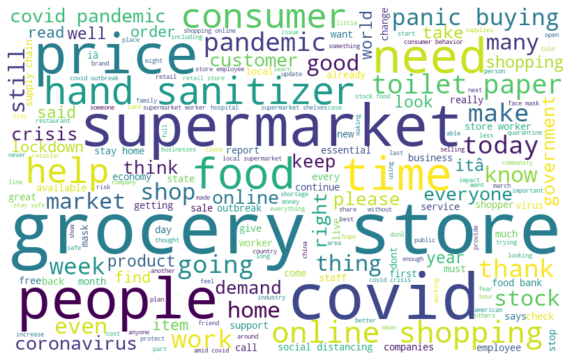

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in dataset['OriginalTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('covid', 10594),
 ('prices', 7800),
 ('store', 6747),
 ('food', 6746),
 ('supermarket', 6623),
 ('grocery', 6056),
 ('people', 5471),
 ('consumer', 4254),
 ('shopping', 3344),
 ('online', 3330),
 ('need', 2699),
 ('pandemic', 2663),
 ('s', 2572),
 ('workers', 2559),
 ('panic', 2410),
 ('like', 2360),
 ('time', 2271),
 ('demand', 2226),
 ('home', 2188),
 ('sanitizer', 2122)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

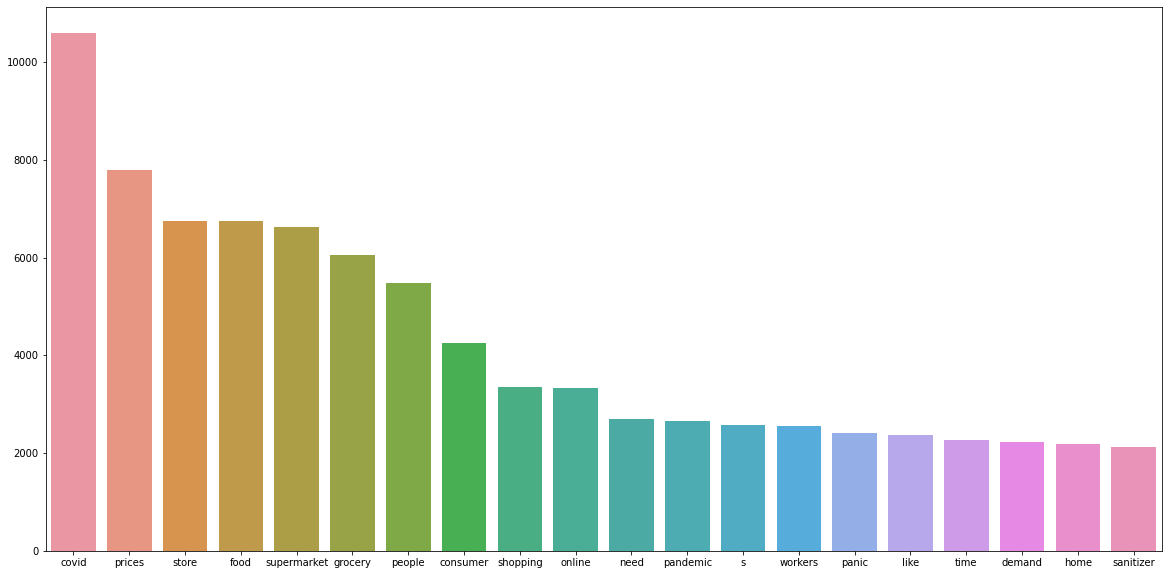

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
sns.barplot(x , y)
plt.show()

### A funtion for stemming operation

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(stemming)

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month,length
0,3799,48751,London,2020-03-16,,Neutral,0,3,16,0
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,Positive,0,3,16,25
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,Positive,0,3,16,12
3,3802,48754,NaN,2020-03-16,food stock empti pleas dont panic enough food ...,Positive,0,3,16,15
4,3803,48755,NaN,2020-03-16,readi supermarket outbreak paranoid food stock...,Extremely Negative,0,3,16,15


### Top words after stemming 

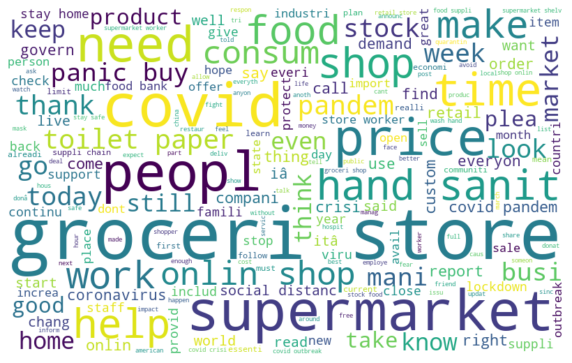

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in dataset['OriginalTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('covid', 10594),
 ('price', 8920),
 ('store', 8103),
 ('supermarket', 7235),
 ('food', 6912),
 ('groceri', 6486),
 ('peopl', 5543),
 ('consum', 4935),
 ('shop', 4833),
 ('need', 3533),
 ('onlin', 3332),
 ('time', 3123),
 ('work', 2964),
 ('worker', 2865),
 ('pandem', 2684),
 ('like', 2681),
 ('hand', 2679),
 ('help', 2642),
 ('sanit', 2569),
 ('stock', 2494)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

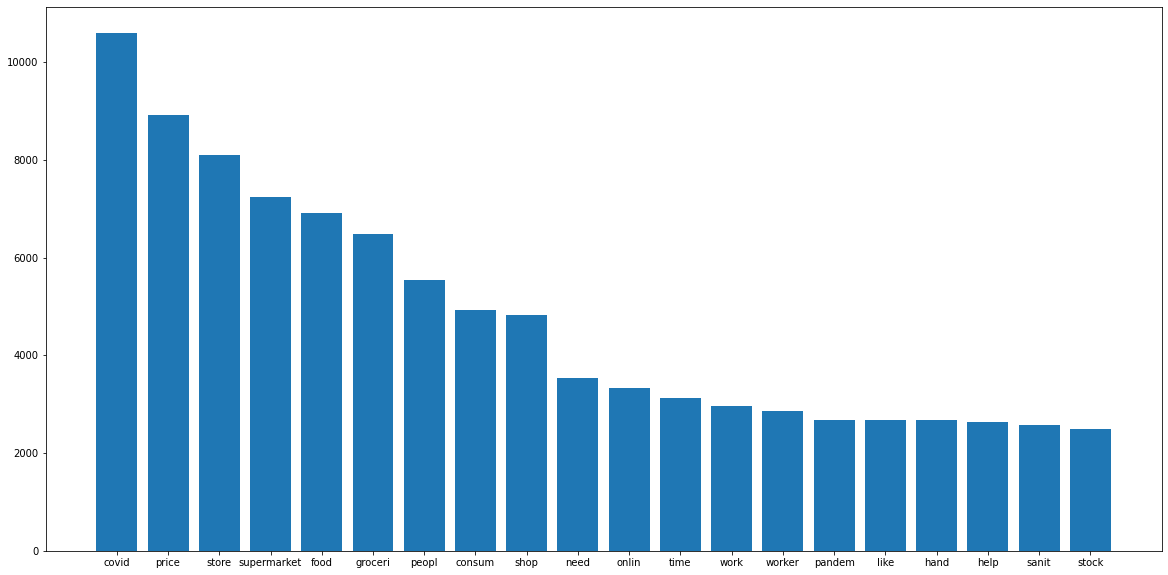

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
plt.bar(x , y)
plt.show()

We can see Covid, price, store, supermarket, food etc are most frequent words in oue tweet data.

### **Feature Encoding**

In [ ]:
# lets convert our dapendant variable into numbers.
''' We have 5 classes in Sentiment Column Lets reduce it to 3 for higher Accuracy'''
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']
           

dataset['Sentiment'].replace(encoding, inplace=True)   

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day_of_week,month,day_of_month,length
0,3799,48751,London,2020-03-16,,1,0,3,16,0
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,2,0,3,16,25
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,2,0,3,16,12
3,3802,48754,NaN,2020-03-16,food stock empti pleas dont panic enough food ...,2,0,3,16,15
4,3803,48755,NaN,2020-03-16,readi supermarket outbreak paranoid food stock...,0,0,3,16,15


In [ ]:
dataset.Sentiment.value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

### **Vectorization**

In [ ]:
# Lets create new dataset of cleaned Tweets.
new_df = dataset[['OriginalTweet','Sentiment']]
new_df.head()

,OriginalTweet,Sentiment
0,,1
1,advic talk neighbour famili exchang phone numb...,2
2,coronavirus australia woolworth give elder dis...,2
3,food stock empti pleas dont panic enough food ...,2
4,readi supermarket outbreak paranoid food stock...,0


In [ ]:
new_df.shape

(41157, 2)

In [ ]:
X= new_df['OriginalTweet']
Y= new_df['Sentiment']

In [ ]:
#importing CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(41157, 5000)

### **Model Building**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


### **Train Test Split**

In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (28809, 5000)
X_test.shape :  (12348, 5000)
y_train.shape :  (28809,)
y_test.shape :  (12348,)


In [ ]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abat',
 'abid',
 'abil',
 'abl',
 'abroad',
 'abrupt',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abuja',
 'abund',
 'abus',
 'academ',
 'accc',
 'acceler',
 'accept',
 'access']

## **Decision Tree**

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test, average='weighted')
dtree_recall= recall_score(dtree_predictions,y_test, average='weighted')

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.4990281827016521
Precision : 0.8997037838073987
Recall : 0.4990281827016521


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

#Performance Metrics
logreg_accuracy = accuracy_score(logreg_predictions,y_test)
logreg_precision = precision_score(logreg_predictions,y_test,average='weighted')
logreg_recall= recall_score(logreg_predictions,y_test,average='weighted')

print('Performance of Logistic Regression')
print('Accuracy :' ,logreg_accuracy)
print('Precision :', logreg_precision)
print('Recall :', logreg_recall)


Performance of Logistic Regression
Accuracy : 0.7948655652737285
Precision : 0.7944074219544606
Recall : 0.7948655652737285


## **KNN Classifier**

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test, average='weighted')
knn_recall= recall_score(knn_predictions,y_test, average='weighted')

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.34021703919663104
Precision : 0.7942753480982444
Recall : 0.34021703919663104


## **Naive Bayes classifier**

In [ ]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predictions= mnb.predict(X_test)

#Performance Metrics
mnb_accuracy= accuracy_score(mnb_predictions,y_test)
mnb_precision= precision_score(mnb_predictions,y_test, average='weighted')
mnb_recall= recall_score(mnb_predictions,y_test, average='weighted')

print('Performance of Naive Bayes classifier')
print('Accuracy :' ,mnb_accuracy)
print('Precision :',mnb_precision)
print('Recall :',mnb_recall)

Performance of Naive Bayes classifier
Accuracy : 0.6867508908325235
Precision : 0.6928456220182466
Recall : 0.6867508908325235


## **Random Forest Clssifier**

In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier(n_estimators=100)
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test, average='weighted')
rcf_recall= recall_score(rcf_predictions,y_test, average='weighted')

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.7712989957887917
Precision : 0.7728274649551724
Recall : 0.7712989957887917


## **XGBoost Classifier**

In [ ]:
#XGBoost Classifier
import xgboost as xgb
xgbcf = MultinomialNB()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= mnb.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test, average='weighted')
xgbcf_recall= recall_score(xgbcf_predictions,y_test, average='weighted')

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.6867508908325235
Precision : 0.6928456220182466
Recall : 0.6867508908325235


## **Comparision Performance of all classifiers**

In [ ]:


models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'Naive Bayes', 
              'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, mnb_accuracy, rcf_accuracy, xgbcf_accuracy, ],
    'Precision': [dtree_precision, logreg_precision, knn_precision, mnb_precision, rcf_precision, xgbcf_precision, ],
    'Recall': [dtree_recall, logreg_recall, knn_recall, mnb_recall, rcf_recall, xgbcf_recall, ]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy,Precision,Recall
1,Logistic Regression,0.794866,0.794407,0.794866
4,Random Forest,0.771299,0.772827,0.771299
3,Naive Bayes,0.686751,0.692846,0.686751
5,XGBoost,0.686751,0.692846,0.686751
0,Decision Tree,0.499028,0.899430,0.499028
2,K Nearest Neighbour,0.340217,0.794275,0.340217


Observation:

1.   We can see from above table that Logistic Regression	have highest Test Accuracy Precision and Recall.
2.   From above observations we can say that Logistic Regression is the best Model.

## **Conclusion**



1.   As we have implemented six different models to predict the sentiment of COVID-19 Tweets. Logistic Regression, Random Forest Classifier, Decision Tree, Naive Bayes, K Nearest Neighbour and Xgboost Classifier.
2.    Logistic Regression model performed the best among them.
In this way, we can explore more from various textual data and tweets. Our models will try to predict the various sentiments correctly.